In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, array_to_img, load_img

In [4]:
#load image
image_file = '/content/cat.jpg'
cat_image = keras.preprocessing.image.load_img(image_file)

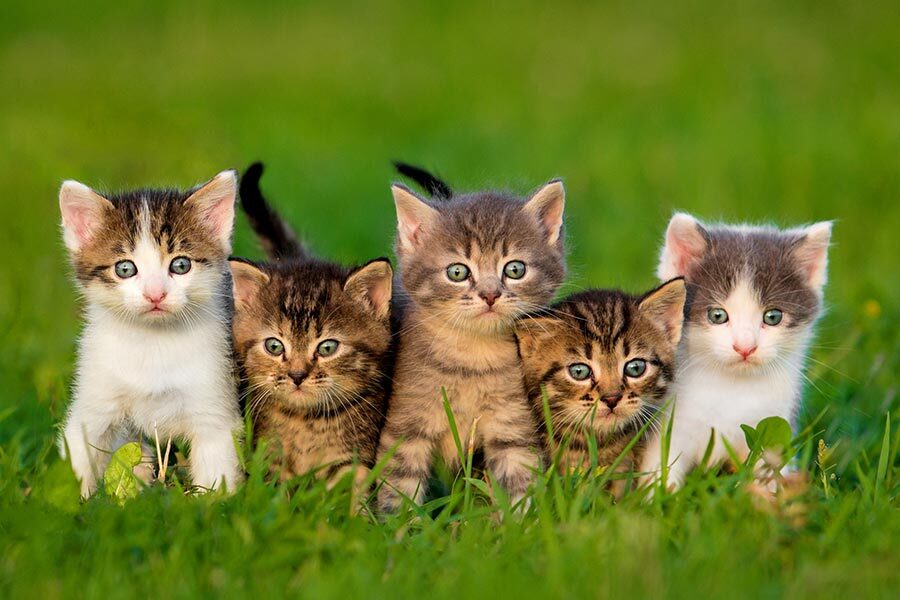

In [5]:
cat_image

In [6]:
cat_array = keras.preprocessing.image.img_to_array(cat_image)
cat = cat_array.reshape((1,)+ cat_array.shape)

In [7]:
cat_array

array([[[ 63., 104.,   2.],
        [ 63., 104.,   2.],
        [ 63., 104.,   2.],
        ...,
        [ 83., 107.,  11.],
        [ 82., 106.,  10.],
        [ 82., 106.,  10.]],

       [[ 63., 104.,   2.],
        [ 63., 104.,   2.],
        [ 63., 104.,   2.],
        ...,
        [ 83., 107.,  11.],
        [ 82., 106.,  10.],
        [ 82., 106.,  10.]],

       [[ 63., 104.,   2.],
        [ 63., 104.,   2.],
        [ 63., 104.,   2.],
        ...,
        [ 83., 107.,  11.],
        [ 82., 106.,  10.],
        [ 82., 106.,  10.]],

       ...,

       [[ 64., 106.,   8.],
        [ 62., 104.,   6.],
        [ 59., 100.,   4.],
        ...,
        [ 80., 110.,  22.],
        [ 79., 109.,  21.],
        [ 78., 108.,  20.]],

       [[ 65., 107.,   9.],
        [ 63., 105.,   7.],
        [ 60., 101.,   5.],
        ...,
        [ 81., 111.,  23.],
        [ 80., 110.,  22.],
        [ 79., 109.,  21.]],

       [[ 66., 108.,  10.],
        [ 64., 106.,   8.],
        [ 61., 1

In [8]:
print(cat_array.shape,cat.shape)

(600, 900, 3) (1, 600, 900, 3)


In [9]:
# build a function to display original image and transformed image
def plot_images(original_image, updated_image):
  plt.figure(figsize = (15,8))
  #original image
  plt.subplot(1,2,1)
  plt.title("original image")
  plt.imshow(original_image)

  #transformed image
  plt.subplot(1,2,2)
  plt.title('transformed image')
  plt.imshow(updated_image)

  plt.show()

In [16]:
#flip an image
transform_fn = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, vertical_flip = True)
transform_array = transform_fn.random_transform(cat_array)
transform_image = keras.preprocessing.image.array_to_img(transform_array)

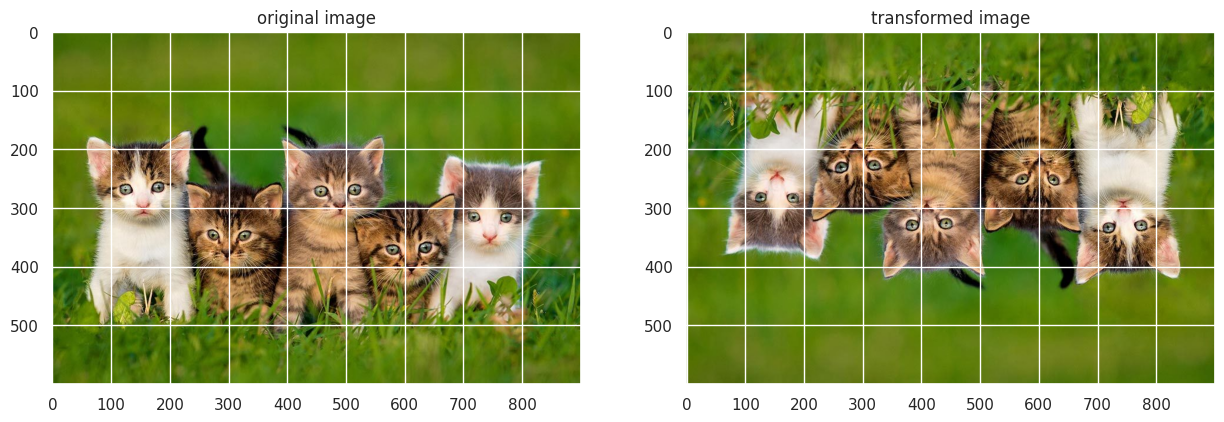

In [17]:
plot_images(cat_image, transform_image)

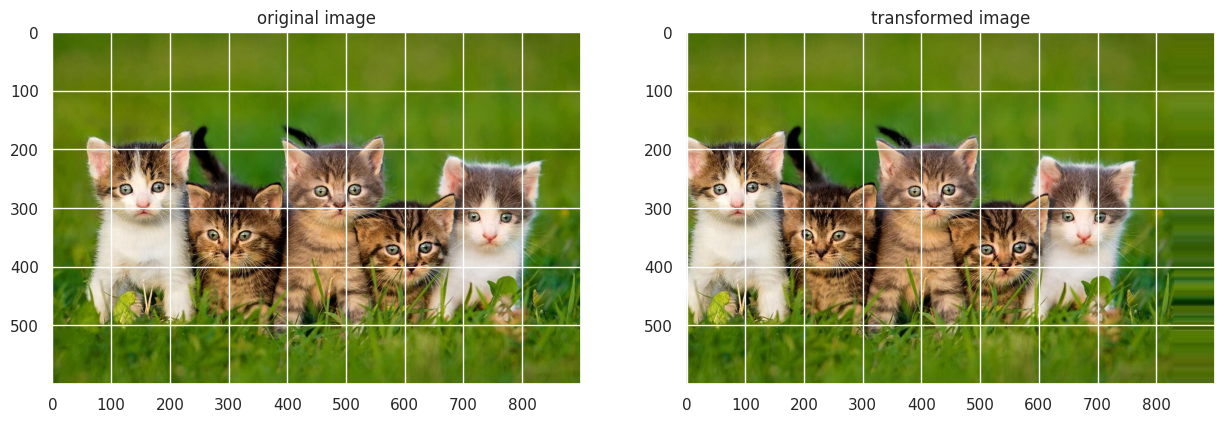

In [24]:
#shifting an image
transform_fn = keras.preprocessing.image.ImageDataGenerator(height_shift_range=150)
transform_array = transform_fn.random_transform(cat_array)
transform_image = keras.preprocessing.image.array_to_img(transform_array)
plot_images(cat_image, transform_image)

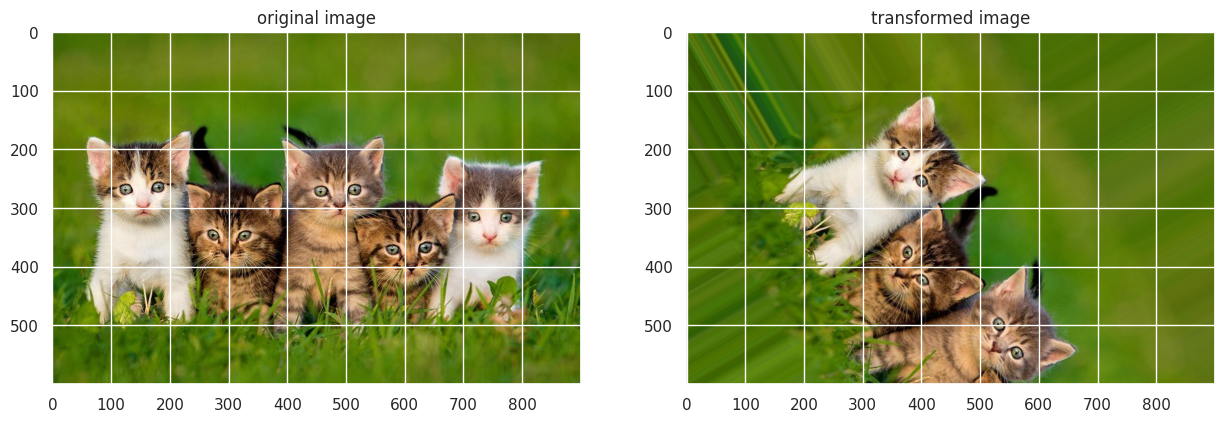

In [25]:
#rotation an image
transform_fn = keras.preprocessing.image.ImageDataGenerator(rotation_range=150)
transform_array = transform_fn.random_transform(cat_array)
transform_image = keras.preprocessing.image.array_to_img(transform_array)
plot_images(cat_image, transform_image)

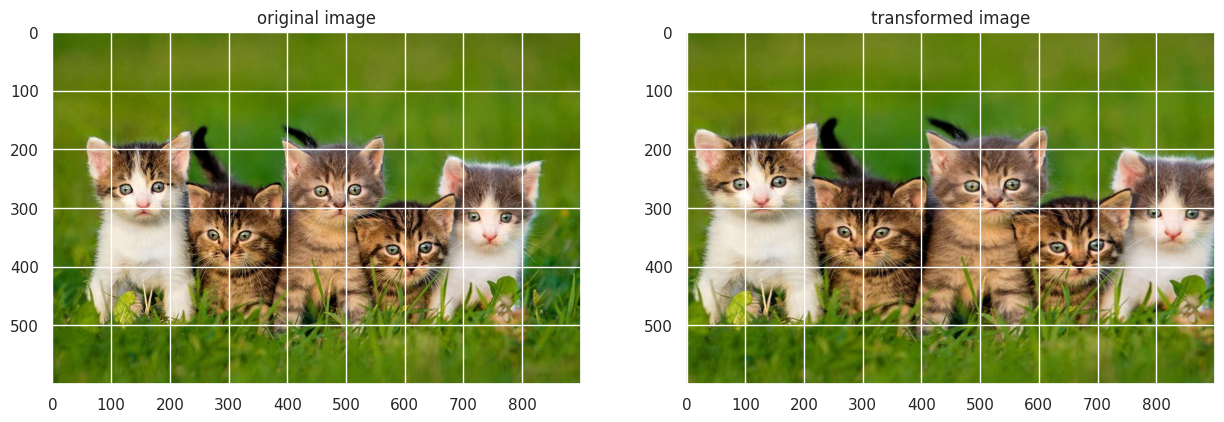

In [27]:
#zooming an image
transform_fn = keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.3,1.3])
transform_array = transform_fn.random_transform(cat_array)
transform_image = keras.preprocessing.image.array_to_img(transform_array)
plot_images(cat_image, transform_image)

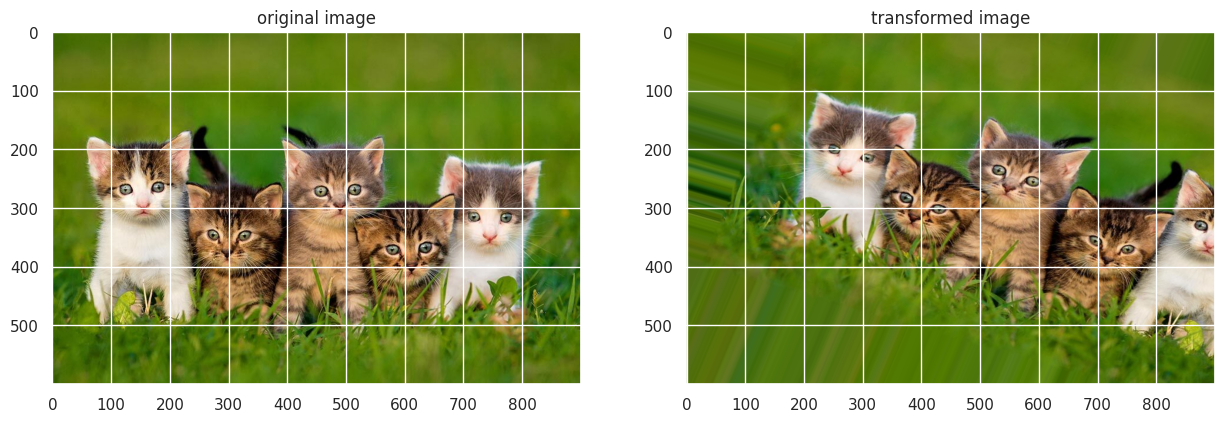

In [28]:
#applying multiple data augmentation transformation approach

transform_fn = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                            vertical_flip = True, height_shift_range=150,
                                                            rotation_range=30, zoom_range=0.3, shear_range=0.2)
transform_array = transform_fn.random_transform(cat_array)
transform_image = keras.preprocessing.image.array_to_img(transform_array)
plot_images(cat_image, transform_image)

In [32]:
augmentation = ImageDataGenerator(horizontal_flip=True,
                                  vertical_flip = True, height_shift_range=150,
                                  rotation_range=30, zoom_range=0.3, shear_range=0.2,
                                  rescale = 1./255)

In [34]:
directory = '/content/sample_data'
i=0

for batch in augmentation.flow(cat, batch_size=1, save_to_dir=directory,
                               save_prefix='image', save_format='jpg'):
  i+=1
  if i>100:
    break